# Исследовательский анализ продаж Тако 

**Автор:** Кононов С.В.

## 1.1 Цель и задачи проекта

**Цель:** провести исследовательский анализ данных, сформулировать гипотезы и проверить их с помощью статистического анализа.

**Задачи:**

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
- изучить популярность различных видов тако;
- выяснить, в какие дни недели и часы заказывают больше всего;
4. Сформулировать гипотезы.
5. Проверить гипотезы с помощью статистического анализа.
6. Сформулировать выводы по проведённому анализу.

## 1.2 Описание данных

**Названия файла:** `taco_sales_(2024-2025).csv`

**Источник:** kaggle

**Период:** 1 января 2024 года - 25 мая 2025 года

**Описание датасета:**

- Order ID - идентификатор заказа
- Restaurant Name - название ресторана
- Location - город в США, где был сделан заказ
- Order Time - время совершения заказа
- Delivery Time - время, когда заказ был доставлен
- Delivery Duration (min) - длительность доставки(мин)
- Taco Size - размер Тако
- Taco Type - вид тако (например, с говядиной, курицей, овощами, рыбой, свининой)
- Toppings Count - количество добавленных дополнительных начинок
- Distance (km) - Расстояние от ресторана до клиента
- Price (`$`) -	цена
- Tip (`$`) - чаевые
- Weekend Order - заказ был сделан в выходные или нет

## 2 Знакомство с данными

### 2.1  Вывод общей информации

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.stats.proportion as st

In [2]:
df = pd.read_csv('/kaggle/input/taco-sales-dataset-20242025/taco_sales_(2024-2025).csv')

In [3]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order ID,1000.0,552504.86500,255948.779709,101139.00,331796.7500,559740.00,771781.7500,999138.00
Delivery Duration (min),1000.0,50.93000,23.227540,10.00,30.0000,53.00,71.0000,90.00
Toppings Count,1000.0,2.52900,1.717005,0.00,1.0000,3.00,4.0000,5.00
Distance (km),1000.0,13.07342,7.142268,0.51,6.9725,13.20,19.2425,24.98
Price ($),1000.0,6.90825,2.310137,3.00,4.5000,6.75,9.2500,10.75
Tip ($),1000.0,1.80611,1.132035,0.01,0.9075,1.76,2.5200,4.98


In [6]:
df.duplicated().sum()

0

### 2.2 Промежуточный вывод по датасету 

Датасет `df` содержит 13 столбцов и 1000 строк.

- 3 столбца представлены в формате float64, 3 в int64, 6 в object и 1 в bool
- Столбцы Order Time и Delivery Time содержат информацию о дате и времени заказа и доставки соответственно. Приведем их к формату datetime
- Для более удобной работы приведем столбцы к формату snake_case, а также удалим приписки (min), (km) и ($)
- В данных нет пропусков и не обнаружено явных дубликатов
- На первый взгляд в столбцах с числовыми данными отсутствуют выбросы (медиана и среднее близки)

## 3 Предобработка данных

### 3.1 Меняем типы данных в столбцах, которые хранят значения даты и времени

In [7]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%d-%m-%Y %H:%M')
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 1000 non-null   int64         
 1   Restaurant Name          1000 non-null   object        
 2   Location                 1000 non-null   object        
 3   Order Time               1000 non-null   datetime64[ns]
 4   Delivery Time            1000 non-null   datetime64[ns]
 5   Delivery Duration (min)  1000 non-null   int64         
 6   Taco Size                1000 non-null   object        
 7   Taco Type                1000 non-null   object        
 8   Toppings Count           1000 non-null   int64         
 9   Distance (km)            1000 non-null   float64       
 10  Price ($)                1000 non-null   float64       
 11  Tip ($)                  1000 non-null   float64       
 12  Weekend Order            1000 non-n

### 3.2 Приводим столбцы к более удобному формату

In [8]:
# удаляем приписки (min), (km) и ($)
df = df.rename(columns = {'Delivery Duration (min)':'Delivery Duration',
                          'Distance (km)': 'Distance',
                          'Price ($)': 'Price',
                          'Tip ($)': 'Tip'
                         })

In [9]:
# функция, которая приводит названия столбцов к формату snake_case
def snake_case(column):
    column = column.lower()
    column = column.replace(' ', '_')
    return column

In [10]:
df.columns = [snake_case(column) for column in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           1000 non-null   int64         
 1   restaurant_name    1000 non-null   object        
 2   location           1000 non-null   object        
 3   order_time         1000 non-null   datetime64[ns]
 4   delivery_time      1000 non-null   datetime64[ns]
 5   delivery_duration  1000 non-null   int64         
 6   taco_size          1000 non-null   object        
 7   taco_type          1000 non-null   object        
 8   toppings_count     1000 non-null   int64         
 9   distance           1000 non-null   float64       
 10  price              1000 non-null   float64       
 11  tip                1000 non-null   float64       
 12  weekend_order      1000 non-null   bool          
dtypes: bool(1), datetime64[ns](2), float64(3), int64(3), object(4)
m

### 3.3 Результаты предобработки

В ходе предобработки названия столбцов датафрейма были приведены к удобному для дальнейшей работы формату. Столбцы, содержащие информацию о дате и времени, были приведены к формату datetime64

## 4 Анализ данных и поиск инсайтов

### 4.1 Выявление самых популярных видов тако

In [11]:
top_taco_type = df['taco_type'].value_counts().reset_index()
top_taco_type['percent_count'] = top_taco_type['count'] / top_taco_type['count'].sum() * 100
top_taco_type

,taco_type,count,percent_count
0,Chicken Taco,218,21.8
1,Fish Taco,211,21.1
2,Veggie Taco,197,19.7
3,Pork Taco,192,19.2
4,Beef Taco,182,18.2


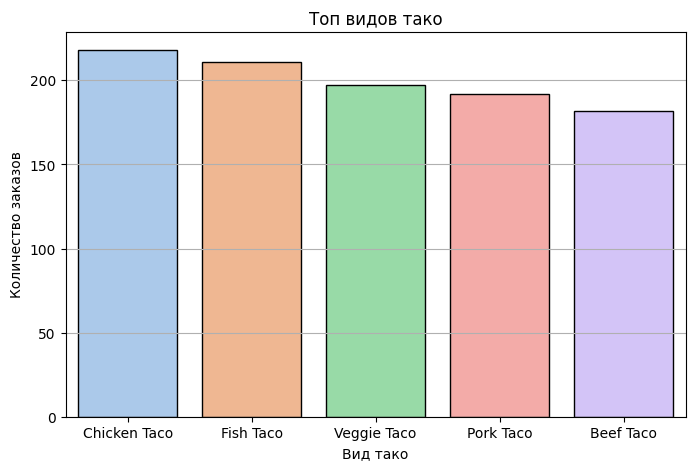

In [12]:
plt.figure(figsize=(8,5))

sns.set_palette('pastel')

sns.barplot(data = top_taco_type,
            x = 'taco_type',
            y = 'count',
            edgecolor = 'black'
           )

plt.title('Топ видов тако')
plt.xlabel('Вид тако')
plt.ylabel('Количество заказов')

plt.grid(axis='y')

plt.show()

### 4.2 Вывод о популярности видов тако

Куриные тако (Chicken Taco) лидируют по популярности - 218 заказов (21.8%), незначительно опережая рыбные (Fish Taco — 211 заказов, 21.1%). Овощные (Veggie Taco) и свиные (Pork Taco) варианты имеют сопоставимый спрос (190-200 заказов, 19-20%), тогда как говяжьи (Beef Taco) наименее востребованы (182 заказа, 18.2%). 

### 4.3 Зависимость количества заказов тако от дня недели и времени заказа 

#### 4.3.1 Зависимость от дня недели

In [13]:
# добавим новый столбец с названием дня недели в датафрейм
df['day_of_week'] = df['order_time'].dt.day_name()
df.head()

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration,taco_size,taco_type,toppings_count,distance,price,tip,weekend_order,day_of_week
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,Thursday
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,Saturday
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,Thursday
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,Saturday
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,Wednesday


In [14]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top_day_of_week = df.groupby('day_of_week')['order_id'].count().reindex(days_order, fill_value=0)
top_day_of_week

day_of_week
Monday       167
Tuesday      145
Wednesday    149
Thursday     128
Friday       136
Saturday     142
Sunday       133
Name: order_id, dtype: int64

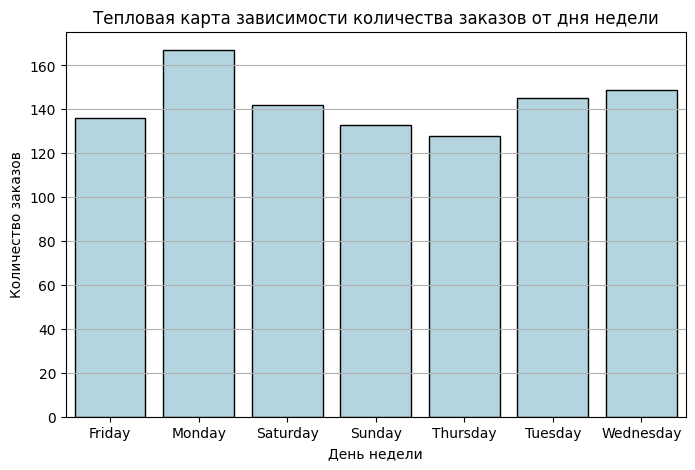

In [15]:
bar_top_day_of_week = df.groupby('day_of_week')['order_id'].count().reset_index()
bar_top_day_of_week = bar_top_day_of_week.rename(columns = {'order_id': 'count'})

plt.figure(figsize=(8,5))

sns.set_palette('pastel')

sns.barplot(data = bar_top_day_of_week,
            x = 'day_of_week',
            y = 'count',
            color = 'lightblue',
            edgecolor = 'black'
           )

plt.title('Тепловая карта зависимости количества заказов от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')

plt.grid(axis='y')

plt.show()

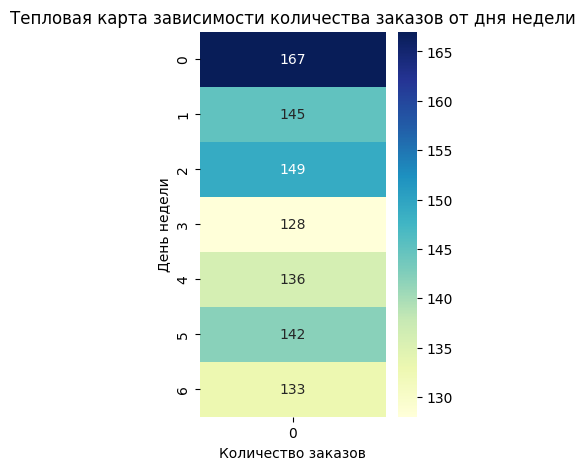

In [16]:
top_day_of_week = top_day_of_week.values.reshape(-1, 1)
plt.figure(figsize=(3,5))

sns.heatmap(top_day_of_week, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Тепловая карта зависимости количества заказов от дня недели')
plt.xlabel('Количество заказов')
plt.ylabel('День недели')

plt.show()

#### 4.3.2 Зависимость от времени заказа

In [17]:
# добавим новый столбец с временем суток в датафрейм
df['hour'] = df['order_time'].dt.hour
df.head()

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration,taco_size,taco_type,toppings_count,distance,price,tip,weekend_order,day_of_week,hour
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,Thursday,14
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,Saturday,17
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,Thursday,20
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,Saturday,6
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,Wednesday,11


In [18]:
top_time_of_day = df.groupby('hour')['order_id'].count().reset_index()
top_time_of_day = top_time_of_day.rename(columns={'order_id': 'count'})
top_time_of_day

,hour,count
0,0,41
1,1,42
2,2,48
3,3,38
4,4,52
5,5,50
6,6,34
7,7,45
8,8,37
9,9,40


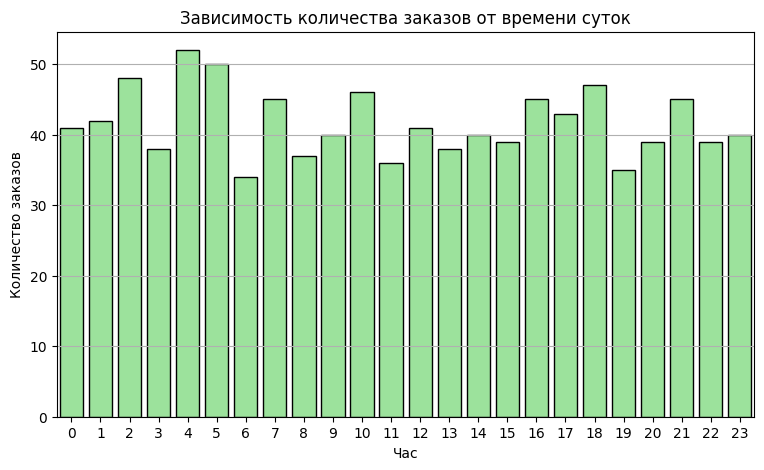

In [19]:
plt.figure(figsize=(9,5))

sns.set_palette('pastel')

sns.barplot(data = top_time_of_day,
            x = 'hour',
            y = 'count',
            color = 'lightgreen',
            edgecolor = 'black'
           )

plt.title('Зависимость количества заказов от времени суток')
plt.xlabel('Час')
plt.ylabel('Количество заказов')

plt.grid(axis='y')

plt.show()

### 4.4 Вывод о зависимости количества заказов тако от дня недели и времени суток

**от дня недели:**

    Наибольшая активность наблюдается в понедельник (167 заказов). Высокая уровань активности продолжается до середены недели, после чего с четверга наблюдается спад. Данная тенденция, вероятно, связано с тем, что людям меньше хочется готовить в начале тяжелой рабочей недели, и заказы тако становятся удобным решением этой задачи.

**от времени суток:**

    - Пиковые часы:
        4:00 (52 заказа)
        18:00 (47 заказов)   
    -Минимальная активность:
        6:00 (34 заказа)
        19:00 (35 заказов)
    -Стабильные периоды:
        С 10:00 до 16:00 и 21:00-23:00 количество заказов держится на уровне 35-46

## 5 Гипотезы

In [20]:
# уровень значимости
alpha = 0.05

### 5.1 Влияние расстояния на время доставки

**H0:** Расстояние (distance) не коррелирует со временем доставки (delivery_duration)

**H1:** Существует положительная корреляция.

### 5.2 Влияния времени доставки на размер чаевых

**H0:** Время доставки (delivery_duration) не влияет на размер чаевых (tip).

**H1:** При более долгой доставке чаевые снижаются.

### 5.3 Различие чаевых в будни и выходные

**H0:** Размер чаевых в будни и выходные не различается. mu1 = mu2
 
**H1:** В выходные дни чаевые выше, чем в будни. mu1 < mu2

### 5.4 Разница в количестве заказов стандартных порций тако и больших 

**H0:** Стандартный размер тако заказывают также часто, как и большой. mu1 = mu2

**H1:** Есть статистически значимая разница в количестве заказов тако больших и стандартных размеров. mu1 ≠ mu2

## 6 Проверка гипотез

### 6.1 Влияние расстояния на время доставки
H0: Расстояние (distance) не коррелирует со временем доставки (delivery_duration)

H1: Существует положительная корреляция.

In [21]:
correlation, p_value = stats.pearsonr(df['distance'], df['delivery_duration'])
print(f"Коэффициент корреляции Пирсона: {correlation}, p-value: {p_value}")

Коэффициент корреляции Пирсона: -0.05555839171705946, p-value: 0.07907651268027377


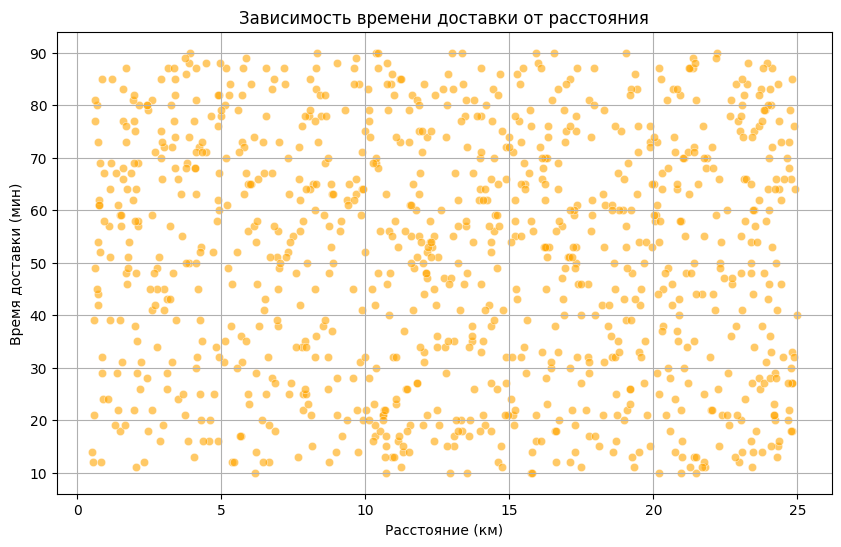

In [22]:
plt.figure(figsize=(10, 6))

sns.set_palette('pastel')

sns.scatterplot(
    data=df,
    x='distance',
    y='delivery_duration',
    alpha=0.6,
    color='orange'
)

plt.title('Зависимость времени доставки от расстояния')
plt.xlabel('Расстояние (км)')
plt.ylabel('Время доставки (мин)')

plt.grid()

plt.show()

### 6.2 Вывод о зависимости времени доставки и расстоянии

H0 не отвергается: нет оснований предполагать, что расстояние коррелирует с временем достаки(p-value: 0.079, Коэффициент корреляции Пирсона: -0.056). Данный вывод подтверждает график рассеяния.

### 6.3 Изучение влияния времени доставки на размер чаевых
H0: Время доставки (delivery_duration) не влияет на размер чаевых (tip).

H1: При более долгой доставке чаевые снижаются.

In [23]:
correlation, p_value = stats.pearsonr(df['tip'], df['delivery_duration'])
print(f"Коэффициент корреляции Пирсона: {correlation}, p-value: {p_value}")

Коэффициент корреляции Пирсона: -0.017751282912226978, p-value: 0.5750109677897971


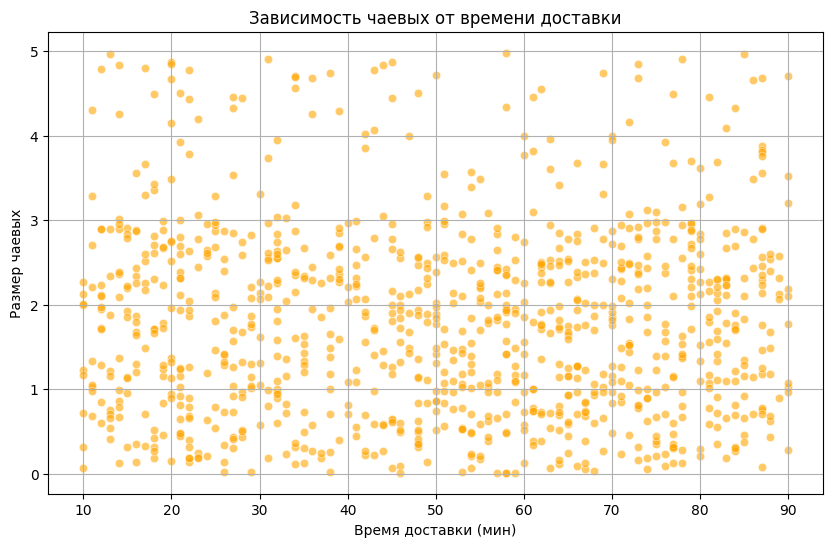

In [24]:
plt.figure(figsize=(10, 6))

sns.set_palette('pastel')

sns.scatterplot(
    data=df,
    x='delivery_duration',
    y='tip',
    alpha=0.6,
    color='orange'
)

plt.title('Зависимость чаевых от времени доставки')
plt.xlabel('Время доставки (мин)')
plt.ylabel('Размер чаевых')

plt.grid()

plt.show()

### 6.4 Вывод о влиянии времени доставки на размер чаевых

H0 не отвергается: нет оснований предполагать, что размер чаевых коррелирует с временем достаки(p-value: 0.575, Коэффициент корреляции Пирсона: -0.018). Данный вывод подтверждает график рассеяния.

### 6.5 Различие чаевых в будни и выходные
H0: Размер чаевых в выходные и будни не различается. mu1 = mu2

H1: В выходные дни чаевые выше, чем в будни. mu1 > mu2

In [25]:
weekend_tip = df[df['weekend_order'] == True]['tip']
weekday_tip = df[df['weekend_order'] == False]['tip']

t_stat, p_value = stats.ttest_ind(weekend_tip, weekday_tip, alternative='greater')
print(f"t-статистика: {t_stat}, p-value: {p_value}")

t-статистика: 13.885377256661187, p-value: 1.6453981264761625e-40


In [26]:
weekend_mean = weekend_tip.mean()
weekday_mean = weekday_tip.mean()
difference = weekend_mean - weekday_mean
difference_percent = difference / weekday_mean * 100

print(f"Средние чаевые в выходные: {weekend_mean:.2f}")
print(f"Средние чаевые в будни: {weekday_mean:.2f}")
print(f"Разница: {difference:.2f} ({difference_percent:.1f}%)")

Средние чаевые в выходные: 2.55
Средние чаевые в будни: 1.53
Разница: 1.02 (66.8%)


### 6.6 Вывод о различие чаевых в будни и выходные

H0 отвергается и принимается альтернативная гипотеза H1: чаевые в выходные выше, чем в будни (t-статистика: 13.89, p-value: 1.65e-40). В среднем прирост чаевых составляет 66.8% (+1.02 $)

### 6.7 Разница в количестве заказов стандартных порций тако и больших
H0: Стандартный размер тако заказывают также часто, как и большой. mu1 = mu2

H1: Есть статистически значимая разница в количестве заказов тако больших и стандартных размеров. mu1 ≠ mu2

In [27]:
large = len(df[df['taco_size'] == 'Large'])
standart = len(df[df['taco_size'] == 'Regular'])

count = [standart, large]
lens = [large + standart, large + standart]

z_stat, p_value = st.proportions_ztest(count, lens)
print(f"z-статистика: {z_stat}, p-value: {p_value}")

z-статистика: 0.17888543819998334, p-value: 0.858027656987521


### 6.8 Вывод о различие количества заказов стандартных и больших порций 
H0 не отвергается: нет оснований предполагать, что какой-то из размеров тако заказывают чаще другого(p-value: 0.858, z-статистика: 0.179). 

## 7 Общий вывывод и рекомендации 

### 7.1 Выводы по результату исследовательского анализу:

1) Популярность видов тако

- Наибольшим спросом пользуются куриные тако (21.8%), незначительно опережая рыбные (21.1%).
- Говяжьи тако наименее востребованы (18.2%).

2) Временные паттерны заказов:

- Дни недели: Пик заказов приходится на понедельник (167 заказов), спад — на четверг-пятницу.
- Время суток: Максимальная активность в 4:00 (52 заказа) и 18:00 (47 заказов), минимум — в 6:00 (34 заказа).


### 7.2 Выводы по результатам проверки гипотез:

1) Расстояние и время доставки:
- Корреляция незначима (p-value: 0.079, Коэффициент корреляции Пирсона: -0.056).
- Рекомендация: исследовать другие факторы, которые влияют на время доставки (время готовки, погодные условия).

2) Чаевые и время доставки:
- Связь отсутствует (p-value: 0.575, Коэффициент корреляции Пирсона: -0.018).
- Инсайт: лояльность клиентов к курьерам созраняется, независимо от времени доставки.

3) Чаевые в выходные vs будни:
- Разница значима (t-статистика: 13.89, p-value: 1.65e-40). В среднем прирост чаевых составляет 66.8% (+1.02 $).
- Действие: увеличть бонусы для курьеров, чтобы замотивировать работать в будние дни.

4) Разница в заказах больших и стандартных порций:
- Стандартные порции заказывают также часто, как и большие (p-value: 0.858, z-статистика: 0.179).
- Вывод: Можно уравнять маркетинговые усилия для обоих размеров.



### 7.3 Рекомендации

- Внедрить программу лояльности для людей, заказывающих в конце рабочей недели.
- Акции на говяжьи тако для повышения их популярности.
- Гибкий график курьеров в выходные (из-за высоких чаевых).
- Мониторить причины долгой доставки, не связанные с расстоянием.